# EXPLORACIÓN DE DATOS

In [1]:
import pandas as pd
import numpy as np

## 1. PREGUNTA SMART (pendiente)

## 2. OBTENCIÓN DE LOS DATOS

In [2]:
anexo5 = pd.read_excel(r"D:\Download\Anexo_5.xlsx")

## 3. ANALIZAR ESTRUCTURA

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

### 3.1 ANALIZAR COLUMNAS

In [4]:
anexo5.columns = anexo5.iloc[0]
anexo5 = anexo5.drop(anexo5.index[0])
anexo5.reset_index(drop=True, inplace=True)

In [5]:
anexo5

,Codigo del Contrato,Nombre del Contrato,Codigo Municipio,Codigo DANE IPS,Codigo Habilitacion IPS,IPS Asignada,Fecha Ingreso al Programa,Primer Apellido,Segundo Apellido,Primer Nombre,Segundo Nombre,Nombre Completo,Tipo Documento,Numero Documento,Edad al Ingreso al Programa,Edad Actual,Genero,Estado Civil,Escolaridad,Direccion Residencia,Telefono,Celular,HTA,Tipo de Diagnostico (Nuevo o conocido),Lapso del Diagnsotico,Descontinuado,Diabetes,Tipo de Diagnostico (Nuevo o conocido),Lapso del Diagnsotico,Descontinuado,Enfermedad Renal Cronica,Tipo de Diagnostico (Nuevo o conocido),Año de Diagnostico,Descontinuado,Sindrome Metabolico,Tipo de Diagnostico (Nuevo o conocido),Lapso del Hallazgo,Condicion Sindrome Metabolico al Ingreso,Riesgo HTA al Ingreso,Riesgo Diabetes al Ingreso,Tipo Diabetes al Ingreso,Tipo de Insulina al Ingreso,TFG (Cockcroft y Gault) al Ingreso Nefroproteccion- Calculo,TFG (CKD) al Ingreso Nefroproteccion - Calculo,TFG al Ingreso Nefroproteccion - Fecha,Estadio Programa de Nefroproteccion al Ingreso,Soporte de enfermedad Renal - Proteinas en 24 Horas,Soporte de enfermedad Renal - Quimico Orina,Soporte de enfermedad Renal - Microalbuminuria,Soporte de enfermedad Renal - Ecografia Renal,Soporte de enfermedad Renal - Regresion Enfermedad,Microalbuminuria / ALB/CRE al Ingreso al Programa Nefroproteccion,Programa Actual,Talla,Peso,Tension Arterial Sistolica,Tension Arterial Diastolica,IMC,Perimetro Abdominal,Creatinina Suero (mg/dl),Fecha Resultado - Creatinina Suero (mg/dl),Micro Albuminuria,Fecha Resultado - Micro Albuminuria,Albuminuria/Creatinuria (mg/g),Fecha Resultado - Albuminuria/Creatinuria (mg/g),Glicemia (mg/dl),Fecha Resultado - Glicemia (mg/dl),HbA1c,Fecha Resultado - HbA1c,Colesterol Total,Fecha Resultado - CT (mg/dl),HDL (mg/dl),Fecha Resultado - HDL (mg/dl),LDL (mg/dl),Fecha Resultado - LDL (mg/dl),Trigliceridos (mg/dl),Fecha Resultado - Trigliceridos (mg/dl),T.F.G. AL INGRESO,Fecha Ultimo Control (Médico),Nombre Especialidad,Codigo Medico,Nombre Medico,Fecha Proximo Control (Médico),Inasistencia al Programa,Causa Inasistencia,Abandono del Programa,Numero de Consultas Medicina General,Numero de Consultas Medicina Interna,Numero de Consultas Medico Subespecialista,Numero de Consultas Nutricion,Numero de Consultas Sicologia,Numero de Consultas Enfermeria,Numero de Consultas Nutricion (Grupales),Numero de Consultas Sicologia (Grupales),Riesgo HTA,Riesgo DIABETES,Tipo Diabetes,Tipo Insulina al Control,Estadio Actual Nefroproteccion,Estadio 1,Numero de Meses,Estadio 2,Numero de Meses,Estadio 3,Numero de Meses,Estadio 4,Numero de Meses,Estadio 5,Numero de Meses,Predialisis,Dialisis,Trasplante,Talla,Peso,Tension Arterial Sistolica,Tension Arterial Diastolica,IMC,Perimetro Abdominal,Hemoglobina g/dl,Fecha Resultado - Hemoglobina g/dl,Hematocrito %,Fecha Resultado - Hematocrito,Glicemia (mg/dl),Fecha Resultado - Glicemia (mg/dl),HbA1c,Fecha Resultado - HbA1c,Colesterol Total,Fecha Resultado - CT (mg/dl),HDL (mg/dl),Fecha Resultado - HDL (mg/dl),LDL (mg/dl) (PREVIO),Fecha Resultado - LDL (mg/dl) (PREVIO),LDL (mg/dl),Fecha Resultado - LDL (mg/dl),Trigliceridos (mg/dl),Fecha Resultado - Trigliceridos (mg/dl),PTH (pg/mL),Fecha Resultado - PTH (pg/mL),Albumina serica (g/dl),Fecha Resultado - Albumina serica (g/dl),Glicemia Post(mg/dl),Fecha Resultado - Glicemia Post(mg/dl),Fosforo serico(P) mg/dl),Fecha Resultado - Fosforo serico(P) mg/dl),Depuracion Creatinina,Fecha Resultado - Depuracion Creatinina,Urea Serica,Fecha Resultado - Urea Serica,Albuminuria (mg/24h),Fecha Resultado - Albuminuria (mg/24h),BUN,Fecha Resultado - BUN,BUN (24h),Fecha Resultado - BUN (24h),Quimico Orina,Fecha Resultado - Quimico Orina,Creatinina Suero (mg/dl),Fecha Resultado - Creatinina Suero (mg/dl),Micro Albuminuria,Fecha Resultado - Micro Albuminuria,Albuminuria/Creatinuria (mg/g),Fecha Resultado - Albuminuria/Creatinuria (mg/g),TFG (Cockcroft y Gault) - Fecha,TFG (Cockcroft y Gault) - Ultimo Control,Diferencia TFG (Cockcroft y Gault) A

### 3.2 TAMAÑO

In [6]:
anexo5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38741 entries, 0 to 38740
Columns: 250 entries, Codigo del Contrato to Programa Actual
dtypes: float64(7), object(243)
memory usage: 73.9+ MB


In [7]:
anexo5.isna().sum()

0
Codigo del Contrato          0
Nombre del Contrato          0
Codigo Municipio             0
Codigo DANE IPS              0
Codigo Habilitacion IPS      0
                          ... 
P. IMC                     467
P. PER. CINTURA            467
P. HGLICO                  467
Codigo Programa PANA         0
Programa Actual              2
Length: 250, dtype: int64

#### 3.2.1 SE DIVIDE EN 8 PARA PODER ANALIZAR TODAS LAS COLUMNAS

In [8]:
dfs = np.array_split(anexo5, 8, axis=1)

In [9]:
dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38741 entries, 0 to 38740
Data columns (total 32 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Codigo del Contrato                      38741 non-null  object        
 1   Nombre del Contrato                      38741 non-null  object        
 2   Codigo Municipio                         38741 non-null  object        
 3   Codigo DANE IPS                          38741 non-null  object        
 4   Codigo Habilitacion IPS                  38741 non-null  object        
 5   IPS Asignada                             38741 non-null  object        
 6   Fecha Ingreso al Programa                38741 non-null  datetime64[ns]
 7   Primer Apellido                          38741 non-null  object        
 8   Segundo Apellido                         33025 non-null  object        
 9   Primer Nombre                          

### 3.3 NULOS

#### SE PUEDE ANONIMIZAR, POR LO QUE SE PUEDE ELIMINAR LOS DATOS PERSONALES

In [10]:
parte1 = dfs[0].copy() 

In [11]:
parte1.columns

Index(['Codigo del Contrato', 'Nombre del Contrato', 'Codigo Municipio',
       'Codigo DANE IPS', 'Codigo Habilitacion IPS', 'IPS Asignada',
       'Fecha Ingreso al Programa', 'Primer Apellido', 'Segundo Apellido',
       'Primer Nombre', 'Segundo Nombre', 'Nombre Completo', 'Tipo Documento',
       'Numero Documento', 'Edad al Ingreso al Programa', 'Edad Actual',
       'Genero', 'Estado Civil', 'Escolaridad', 'Direccion Residencia',
       'Telefono', 'Celular', 'HTA', 'Tipo de Diagnostico (Nuevo o conocido) ',
       'Lapso del Diagnsotico ', 'Descontinuado', 'Diabetes',
       'Tipo de Diagnostico (Nuevo o conocido)', 'Lapso del Diagnsotico',
       'Descontinuado', 'Enfermedad Renal Cronica',
       'Tipo de Diagnostico (Nuevo o conocido)'],
      dtype='object', name=0)

In [12]:
parte1.drop(columns=['Codigo del Contrato', 'Nombre del Contrato', 'Codigo Municipio',
       'Codigo DANE IPS', 'Codigo Habilitacion IPS','Primer Apellido', 'Segundo Apellido',
       'Primer Nombre', 'Segundo Nombre', 'Nombre Completo', 'Tipo Documento',
       'Numero Documento','Direccion Residencia','Telefono', 'Celular'], inplace=True)

In [13]:
parte1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38741 entries, 0 to 38740
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   IPS Asignada                             38741 non-null  object        
 1   Fecha Ingreso al Programa                38741 non-null  datetime64[ns]
 2   Edad al Ingreso al Programa              38741 non-null  object        
 3   Edad Actual                              38741 non-null  object        
 4   Genero                                   38741 non-null  object        
 5   Estado Civil                             36675 non-null  object        
 6   Escolaridad                              38741 non-null  object        
 7   HTA                                      35721 non-null  object        
 8   Tipo de Diagnostico (Nuevo o conocido)   32726 non-null  object        
 9   Lapso del Diagnsotico                  

#### ELIMINAR LAS COLUMNAS SIN DATOS

In [14]:
parte1.drop(columns=['Descontinuado'], inplace=True)

In [15]:
parte1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38741 entries, 0 to 38740
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   IPS Asignada                             38741 non-null  object        
 1   Fecha Ingreso al Programa                38741 non-null  datetime64[ns]
 2   Edad al Ingreso al Programa              38741 non-null  object        
 3   Edad Actual                              38741 non-null  object        
 4   Genero                                   38741 non-null  object        
 5   Estado Civil                             36675 non-null  object        
 6   Escolaridad                              38741 non-null  object        
 7   HTA                                      35721 non-null  object        
 8   Tipo de Diagnostico (Nuevo o conocido)   32726 non-null  object        
 9   Lapso del Diagnsotico                  

#### HAY VARIAS COLUMNAS CON EL MISMO NOMBRE, CAMBIAR LOS NOMBRES

In [16]:
parte1.columns.values[8] = 'diagnostico_conocido_hta'
parte1.columns.values[11] = 'diagnostico_conocido_diabetes'
parte1.columns.values[14] = 'diagnostico_conocido_renal'

##### NO CREO RELEVANTE LAS COLUMNAS DE LAPSOS DE DIAGNÓSTICO SE ELIMINAN

In [17]:
parte1.columns

Index(['IPS Asignada', 'Fecha Ingreso al Programa',
       'Edad al Ingreso al Programa', 'Edad Actual', 'Genero', 'Estado Civil',
       'Escolaridad', 'HTA', 'diagnostico_conocido_hta',
       'Lapso del Diagnsotico ', 'Diabetes', 'diagnostico_conocido_diabetes',
       'Lapso del Diagnsotico', 'Enfermedad Renal Cronica',
       'diagnostico_conocido_renal'],
      dtype='object', name=0)

In [18]:
parte1.drop(columns=['Lapso del Diagnsotico ',
                     'Lapso del Diagnsotico'],
            inplace=True)

In [19]:
parte1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38741 entries, 0 to 38740
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   IPS Asignada                   38741 non-null  object        
 1   Fecha Ingreso al Programa      38741 non-null  datetime64[ns]
 2   Edad al Ingreso al Programa    38741 non-null  object        
 3   Edad Actual                    38741 non-null  object        
 4   Genero                         38741 non-null  object        
 5   Estado Civil                   36675 non-null  object        
 6   Escolaridad                    38741 non-null  object        
 7   HTA                            35721 non-null  object        
 8   diagnostico_conocido_hta       32726 non-null  object        
 9   Diabetes                       14216 non-null  object        
 10  diagnostico_conocido_diabetes  14215 non-null  object        
 11  Enfermedad Rena

#### CONVERTIR LA EDAD A NUMÉRICO

In [20]:
parte1['Edad Actual'] = parte1['Edad Actual'].astype(int)
parte1['Edad al Ingreso al Programa'] = parte1['Edad al Ingreso al Programa'].astype(int)

### 4. DIVIDIR CATEGORICOS DE NUMÉRICOS

#### REVISAR VALORES ÚNICOS DE LAS DEMÁS COLUMNAS

In [21]:
parte1['Genero'].unique()

array(['F', 'M'], dtype=object)

In [22]:
parte1['Escolaridad'].unique()

array([2, 9, 7, 13, 3, 10, 11, 1, 8, 6, 4, 5, 12], dtype=object)

In [23]:
parte1['Estado Civil'].unique()

array(['VIUDO', 'CASADO', 'SEPARADO', nan, 'SOLTERO', 'UNION LIBRE',
       'NO APLICA'], dtype=object)

In [24]:
parte1['HTA'].unique()

array(['X', nan], dtype=object)

In [25]:
parte1['Diabetes'].unique()

array([nan, 'X'], dtype=object)

In [26]:
parte1['Enfermedad Renal Cronica'].unique()

array(['X', nan], dtype=object)

In [27]:
parte1['diagnostico_conocido_hta'].unique()

array(['ANTIGUO', 'NUEVO', nan], dtype=object)

In [28]:
parte1['diagnostico_conocido_diabetes'].unique()

array([nan, 'ANTIGUO', 'NUEVO'], dtype=object)

In [29]:
parte1['diagnostico_conocido_renal'].unique()

array([nan, 'NUEVO', 'ANTIGUO'], dtype=object)

##### NORMALIZAR

In [30]:
parte1.loc[parte1['Genero']=='F','Genero'] = 1
parte1.loc[parte1['Genero']=='M','Genero'] = 0
parte1['Genero'] = parte1['Genero'].astype(int)

In [31]:
parte1['Escolaridad'] = parte1['Escolaridad'].astype(int)

##### PARA ESTADO CIVIL, ANTES DE NORMALIZAR VAMOS A IMPUTAR LOS NULOS CON LA MODA

In [32]:
parte1['Estado Civil'] = parte1['Estado Civil'].fillna(parte1['Estado Civil'].mode()[0]) 

##### LABEL ENCODING

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
parte1['Estado Civil'] = le.fit_transform(parte1['Estado Civil'])

##### PARA HTA, Diabetes y Enfermedad Renal Crónica se entiende que si tiene X es porque aplica, y NaN, No aplica

In [34]:
parte1.loc[parte1['HTA']=='X','HTA'] = 1
parte1.loc[parte1['HTA'].isna(),'HTA'] = 0
parte1['HTA'] = parte1['HTA'].astype(int)

In [35]:
parte1.loc[parte1['Diabetes']=='X','Diabetes'] = 1
parte1.loc[parte1['Diabetes'].isna(),'Diabetes'] = 0
parte1['Diabetes'] = parte1['Diabetes'].astype(int)

In [36]:
parte1.loc[parte1['Enfermedad Renal Cronica']=='X','Enfermedad Renal Cronica'] = 1
parte1.loc[parte1['Enfermedad Renal Cronica'].isna(),'Enfermedad Renal Cronica'] = 0
parte1['Enfermedad Renal Cronica'] = parte1['Enfermedad Renal Cronica'].astype(int)

##### Para diagnostico_conocido hta / diabetes / renal, se entiende que sólo aplicaría para los que tienen la enfermedad, por eso sólo se validan los datos nulos frente a la enfermedaad y con la fecha de ingreso al programa se decide si es antiguo o nuevo

In [37]:
nuevo = parte1[parte1['diagnostico_conocido_hta']=='NUEVO']
antiguo = parte1[parte1['diagnostico_conocido_hta']=='ANTIGUO']

In [38]:
nuevo['Fecha Ingreso al Programa'].max()

Timestamp('2023-12-09 00:00:00')

In [39]:
antiguo['Fecha Ingreso al Programa'].max()

Timestamp('2023-12-09 00:00:00')

#### COMO LAS FECHAS MÁXIMAS SON LAS MISMAS, ENTONCES MIRAREMOS LOS PROMEDIOS

In [40]:
antiguo['Fecha Ingreso al Programa'].mean()

Timestamp('2017-12-05 03:00:57.637700096')

In [41]:
nuevo['Fecha Ingreso al Programa'].min()

Timestamp('2008-08-30 00:00:00')

In [42]:
antiguo['Fecha Ingreso al Programa'].min()

Timestamp('2008-09-10 00:00:00')

#### TAMPOCO ES MUY DETERMINANTE, PERO SE HARÁ IMPUTACIÓN BASADA EN EL PROMEDIO 

In [43]:
mask = ((parte1['HTA']==1) & (parte1['diagnostico_conocido_hta'].isna()))
fecha_inicio = pd.to_datetime('2008-09-10')
fecha_fin = pd.to_datetime('2017-12-31')
mask2 = (parte1['Fecha Ingreso al Programa'].between(fecha_inicio, fecha_fin) )
parte1.loc[(mask) & (mask2), 'diagnostico_conocido_hta']= 'ANTIGUO'
parte1.loc[(mask) & (~mask2), 'diagnostico_conocido_hta']= 'NUEVO'

In [44]:
parte1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38741 entries, 0 to 38740
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   IPS Asignada                   38741 non-null  object        
 1   Fecha Ingreso al Programa      38741 non-null  datetime64[ns]
 2   Edad al Ingreso al Programa    38741 non-null  int32         
 3   Edad Actual                    38741 non-null  int32         
 4   Genero                         38741 non-null  int32         
 5   Estado Civil                   38741 non-null  int32         
 6   Escolaridad                    38741 non-null  int32         
 7   HTA                            38741 non-null  int32         
 8   diagnostico_conocido_hta       35721 non-null  object        
 9   Diabetes                       38741 non-null  int32         
 10  diagnostico_conocido_diabetes  14215 non-null  object        
 11  Enfermedad Rena

#### SE ENTIENDE QUE LOS NULOS SON QUE NO , YA QUE NO TIENEN MARCA EN HTA, así que se les asigna la categoría NA.

In [45]:
mask = ((parte1['HTA']==0) & (parte1['diagnostico_conocido_hta'].isna()))

In [46]:
parte1.loc[mask,'diagnostico_conocido_hta']= 'NA'

#### SE REPITE EL PROCESO PARA LA DE DIABETES Y RENAL

In [47]:
mask = ((parte1['Diabetes']==1) & (parte1['diagnostico_conocido_diabetes'].isna()))
parte1[mask]

,IPS Asignada,Fecha Ingreso al Programa,Edad al Ingreso al Programa,Edad Actual,Genero,Estado Civil,Escolaridad,HTA,diagnostico_conocido_hta,Diabetes,diagnostico_conocido_diabetes,Enfermedad Renal Cronica,diagnostico_conocido_renal
2269,UT SALUD DE OCCIDENTE SEDE VASQUEZ COBO IPS-CONSULTA,2013-03-09,40,51,1,3,8,1,NUEVO,1,NaN,0,NaN
22302,UT SALUD DE OCCIDENTE SEDE CALLE 26 IPS-CONSULTA,2009-03-13,67,82,1,0,2,1,NUEVO,1,NaN,1,NUEVO


##### SÓLO SON 2 LOS NULOS Y LAS FECHAS DE INGRESO SON MUY ANTIGUAS, ASÍ QUE SE ASIGNA ANTIGUO Y LOS DEMÁS NA

In [48]:
parte1.loc[mask,'diagnostico_conocido_diabetes']='ANTIGUO'
parte1.loc[(parte1['diagnostico_conocido_diabetes'].isna()),
           'diagnostico_conocido_diabetes']='NA'

In [49]:
mask = ((parte1['Enfermedad Renal Cronica']==1) & (parte1['diagnostico_conocido_renal'].isna()))
parte1[mask]

,IPS Asignada,Fecha Ingreso al Programa,Edad al Ingreso al Programa,Edad Actual,Genero,Estado Civil,Escolaridad,HTA,diagnostico_conocido_hta,Diabetes,diagnostico_conocido_diabetes,Enfermedad Renal Cronica,diagnostico_conocido_renal
0,UT SALUD DE OCCIDENTE SEDE CAPITOLIO-CONSULTA,2019-10-17,73,78,1,5,2,1,ANTIGUO,0,NA,1,NaN
15,UT SALUD DE OCCIDENTE SEDE CALLE 26 IPS-CONSULTA,2020-11-17,81,84,0,0,2,0,NA,1,NUEVO,1,NaN
24,UT SALUD DE OCCIDENTE SEDE VILLACOLOMBIA,2022-03-22,77,79,0,3,13,1,NUEVO,0,NA,1,NaN
48,UT SALUD DE OCCIDENTE SEDE CALLE 26 IPS-CONSULTA,2009-11-04,50,64,0,4,2,1,NUEVO,1,ANTIGUO,1,NaN
112,UT SALUD DE OCCIDENTE SEDE CAPITOLIO-CONSULTA,2021-11-03,67,69,0,3,2,1,NUEVO,0,NA,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36317,IPS INGENIO,2021-07-30,75,77,0,3,13,1,ANTIGUO,0,NA,1,NaN
36375,UT SALUD DE OCCIDENTE SEDE VASQUEZ COBO IPS-CONSULTA,2021-03-08,77,80,1,5,13,1,NUEVO,1,ANTIGUO,1,NaN
36471,UT SALUD DE OCCIDENTE SEDE VASQUEZ COBO IPS-CONSULTA,2021-12-06,78,80,1,3,13,1,ANTIGUO,0,NA,1,NaN
36622,UT SALUD DE OCCIDENTE SEDE VILLACOLOMBIA,2021-09-13,73,75,0,3,13,1,NUEVO,0,NA,1,NaN


In [50]:
nuevo = parte1[parte1['diagnostico_conocido_renal']=='NUEVO']
antiguo = parte1[parte1['diagnostico_conocido_renal']=='ANTIGUO']

In [51]:
nuevo['Fecha Ingreso al Programa'].max()

Timestamp('2021-08-10 00:00:00')

In [52]:
antiguo['Fecha Ingreso al Programa'].max()

Timestamp('2021-06-15 00:00:00')

In [53]:
nuevo['Fecha Ingreso al Programa'].min()

Timestamp('2008-09-03 00:00:00')

In [54]:
antiguo['Fecha Ingreso al Programa'].min()

Timestamp('2008-08-30 00:00:00')

In [55]:
antiguo['Fecha Ingreso al Programa'].mean()

Timestamp('2012-06-01 01:59:52.315901696')

In [56]:
nuevo['Fecha Ingreso al Programa'].mean()

Timestamp('2011-02-18 00:28:09.099526144')

In [57]:
fecha_inicio = pd.to_datetime('2008-09-10')
fecha_fin = pd.to_datetime('2017-12-31')
mask2 = (parte1['Fecha Ingreso al Programa'].between(fecha_inicio, fecha_fin) )
parte1.loc[(mask) & (mask2), 'diagnostico_conocido_renal']= 'ANTIGUO'
parte1.loc[(mask) & (~mask2), 'diagnostico_conocido_renal']= 'NUEVO'

#### LABEL ENCODING

In [58]:
parte1['diagnostico_conocido_hta'] = le.fit_transform(parte1['diagnostico_conocido_hta'])
parte1['diagnostico_conocido_diabetes'] = le.fit_transform(parte1['diagnostico_conocido_diabetes'])
parte1['diagnostico_conocido_renal'] = le.fit_transform(parte1['diagnostico_conocido_renal'])

### REVISAR 2DA PARTE

In [59]:
parte2 = dfs[1].copy()

In [60]:
parte2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38741 entries, 0 to 38740
Data columns (total 32 columns):
 #   Column                                                                Non-Null Count  Dtype         
---  ------                                                                --------------  -----         
 0   Año de Diagnostico                                                    6085 non-null   object        
 1   Descontinuado                                                         0 non-null      object        
 2   Sindrome Metabolico                                                   1202 non-null   object        
 3   Tipo de Diagnostico (Nuevo o conocido)                                0 non-null      object        
 4   Lapso del Hallazgo                                                    0 non-null      object        
 5   Condicion Sindrome Metabolico al Ingreso                              0 non-null      object        
 6   Riesgo HTA al Ingreso                 

##### ELIMINAR LAS COLUMNAS NULAS O POCOS REGISTROS

In [61]:
parte2 = parte2.dropna(axis=1, how='all')

In [62]:
porcentaje_nulos = parte2.isnull().mean() * 100
columnas_a_eliminar = porcentaje_nulos > 90
parte2 = parte2.loc[:, ~columnas_a_eliminar]

In [63]:
parte2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38741 entries, 0 to 38740
Data columns (total 22 columns):
 #   Column                                                       Non-Null Count  Dtype         
---  ------                                                       --------------  -----         
 0   Año de Diagnostico                                           6085 non-null   object        
 1   Riesgo HTA al Ingreso                                        22389 non-null  object        
 2   Riesgo Diabetes al Ingreso                                   13827 non-null  object        
 3   Tipo Diabetes al Ingreso                                     12974 non-null  object        
 4   Tipo de Insulina al Ingreso                                  4478 non-null   object        
 5   TFG (Cockcroft y Gault) al Ingreso Nefroproteccion- Calculo  36792 non-null  object        
 6   TFG al Ingreso Nefroproteccion - Fecha                       36916 non-null  datetime64[ns]
 7   Estadio Progr

In [64]:
parte2['Riesgo HTA al Ingreso'].unique()

array(['BAJO', 'MODERADO', nan, 'ALTO'], dtype=object)

In [65]:
parte2['Riesgo Diabetes al Ingreso'].unique()

array([nan, 'MODERADO', 'BAJO', 'ALTO'], dtype=object)

#### ELIMINAR COLUMNAS FECHAS QUE PARA ESTE EJERCICIO CREO QUE NO APORTAN VALOR

In [66]:
parte2 = parte2.select_dtypes(exclude=['datetime64[ns]'])

In [67]:
parte2.drop(columns=['Soporte de enfermedad Renal - Microalbuminuria',
                    'Fecha Resultado -  Creatinina Suero (mg/dl)',
                    'Fecha Resultado -  Micro Albuminuria',
                    'Año de Diagnostico'], 
            inplace= True)

In [68]:
parte2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38741 entries, 0 to 38740
Data columns (total 16 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   Riesgo HTA al Ingreso                                        22389 non-null  object
 1   Riesgo Diabetes al Ingreso                                   13827 non-null  object
 2   Tipo Diabetes al Ingreso                                     12974 non-null  object
 3   Tipo de Insulina al Ingreso                                  4478 non-null   object
 4   TFG (Cockcroft y Gault) al Ingreso Nefroproteccion- Calculo  36792 non-null  object
 5   Estadio Programa de Nefroproteccion al Ingreso               36920 non-null  object
 6   Programa Actual                                              38739 non-null  object
 7   Talla                                                        38496 non-null  object
 

##### REVISAR ÚNICOS

In [69]:
parte2['Programa Actual'].unique()

array(['Programa de Nefroproteccion', 'Programa de Hipertension',
       'Programa de Diabetes', nan], dtype=object)

In [70]:
parte2['Tipo Diabetes al Ingreso'].unique()

array([nan, 'DIABETES TIPO II', 'DIABETES TIPO I',
       'DIABETES TIPO II - INSULINOREQUIRIENTE'], dtype=object)

In [71]:
parte2['Tipo de Insulina al Ingreso'].unique()

array([nan, 'ANALOGA', 'CONVENCIONAL'], dtype=object)

In [81]:
parte2.loc[parte2['Tipo Diabetes al Ingreso'].isna(),'Tipo Diabetes al Ingreso'] = 'NA'
parte2.loc[parte2['Tipo de Insulina al Ingreso'].isna(),'Tipo de Insulina al Ingreso'] = 'NA'
parte2.loc[parte2['Riesgo HTA al Ingreso'].isna(),'Riesgo HTA al Ingreso'] = 'NA'
parte2.loc[parte2['Riesgo Diabetes al Ingreso'].isna(),'Riesgo Diabetes al Ingreso'] = 'NA'

In [82]:
parte2['Tipo Diabetes al Ingreso'] = le.fit_transform(parte2['Tipo Diabetes al Ingreso'])
parte2['Tipo de Insulina al Ingreso'] = le.fit_transform(parte2['Tipo de Insulina al Ingreso'])
parte2['Riesgo HTA al Ingreso'] = le.fit_transform(parte2['Riesgo HTA al Ingreso'])
parte2['Riesgo Diabetes al Ingreso'] = le.fit_transform(parte2['Riesgo Diabetes al Ingreso'])

In [89]:
parte2['Micro Albuminuria']= parte2['Micro Albuminuria'].astype(float)

In [90]:
parte2['Micro Albuminuria'].describe()

count    21957.00000
mean        15.37359
std         86.84932
min          0.00000
25%          1.00000
50%          4.53000
75%         10.40000
max       9603.00000
Name: Micro Albuminuria, dtype: float64

In [91]:
parte2[parte2['Micro Albuminuria'].notna()]

,Riesgo HTA al Ingreso,Riesgo Diabetes al Ingreso,Tipo Diabetes al Ingreso,Tipo de Insulina al Ingreso,TFG (Cockcroft y Gault) al Ingreso Nefroproteccion- Calculo,Estadio Programa de Nefroproteccion al Ingreso,Programa Actual,Talla,Peso,Tension Arterial Sistolica,Tension Arterial Diastolica,IMC,Perimetro Abdominal,Creatinina Suero (mg/dl),Micro Albuminuria,Albuminuria/Creatinuria (mg/g)
6,3,3,3,2,91.67,0,Programa de Hipertension,158,55,120,80,22.03,84,0.5,1.00,0.48
7,3,3,3,2,69.06,2,Programa de Hipertension,145,50,140,80,23.78,86,0.68,0.70,9.79
8,3,3,3,2,125.93,0,Programa de Hipertension,158,79,140,80,31.65,111,0.69,4.60,2.71
9,1,1,1,0,649.31,0,Programa de Diabetes,145,79,120,80,37.57,91,1,91.00,63.75
11,3,2,1,2,54.26,3,Programa de Diabetes,169,73.7,140,80,25.80,98,1.02,7.60,19.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33971,1,3,3,1,80.01,2,Programa de Nefroproteccion,171,80,135,80,27.36,106,0.72,0.47,0.20
33972,1,3,3,1,80.01,2,Programa de Nefroproteccion,170,71.0,110,70,24.57,80,0.72,0.47,0.20
34027,2,3,3,2,81.24,2,Programa de Hipertension,168,85,120,80,30.12,114,0.93,1.69,0.28
34028,2,3,3,2,81.24,2,Programa de Hipertension,166,88.0,120,80,31.93,122,0.93,1.69,0.28


### PARTE 3

In [77]:
parte3 = dfs[2].copy() 

In [79]:
parte3.columns

Index(['Fecha Resultado -  Albuminuria/Creatinuria (mg/g)', 'Glicemia (mg/dl)',
       'Fecha Resultado -  Glicemia (mg/dl)', 'HbA1c',
       'Fecha Resultado -  HbA1c', 'Colesterol Total',
       'Fecha Resultado -  CT (mg/dl)', 'HDL (mg/dl)',
       'Fecha Resultado -  HDL (mg/dl)', 'LDL (mg/dl)',
       'Fecha Resultado -  LDL (mg/dl)', 'Trigliceridos (mg/dl)',
       'Fecha Resultado -  Trigliceridos (mg/dl)', 'T.F.G. AL INGRESO',
       'Fecha Ultimo Control (Médico)', 'Nombre Especialidad', 'Codigo Medico',
       'Nombre Medico', 'Fecha Proximo Control (Médico)',
       'Inasistencia al Programa', 'Causa Inasistencia',
       'Abandono del Programa', 'Numero de Consultas Medicina General',
       'Numero de Consultas Medicina Interna',
       'Numero de Consultas Medico Subespecialista',
       'Numero de Consultas Nutricion', 'Numero de Consultas Sicologia',
       'Numero de Consultas Enfermeria',
       'Numero de Consultas Nutricion (Grupales)',
       'Numero de Consultas S

In [80]:
parte3.drop(columns=['Fecha Resultado -  Albuminuria/Creatinuria (mg/g)',
       'Fecha Resultado -  Glicemia (mg/dl)', 
       'Fecha Resultado -  HbA1c', 
       'Fecha Resultado -  CT (mg/dl)', 
       'Fecha Resultado -  HDL (mg/dl)', 
       'Fecha Resultado -  LDL (mg/dl)', 
       'Fecha Resultado -  Trigliceridos (mg/dl)', 
       'Fecha Ultimo Control (Médico)', 'Nombre Especialidad', 'Codigo Medico',
       'Nombre Medico', 'Fecha Proximo Control (Médico)',
       'Inasistencia al Programa', 'Causa Inasistencia',
       'Abandono del Programa'], inplace=True)

In [94]:
parte3.columns

Index(['Glicemia (mg/dl)', 'HbA1c', 'Colesterol Total', 'HDL (mg/dl)',
       'LDL (mg/dl)', 'Trigliceridos (mg/dl)', 'T.F.G. AL INGRESO',
       'Numero de Consultas Medicina General',
       'Numero de Consultas Medicina Interna',
       'Numero de Consultas Medico Subespecialista',
       'Numero de Consultas Nutricion', 'Numero de Consultas Sicologia',
       'Numero de Consultas Enfermeria',
       'Numero de Consultas Nutricion (Grupales)',
       'Numero de Consultas Sicologia (Grupales)', 'Riesgo HTA'],
      dtype='object', name=0)

In [93]:
parte3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38741 entries, 0 to 38740
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Glicemia (mg/dl)                            37769 non-null  object
 1   HbA1c                                       30595 non-null  object
 2   Colesterol Total                            37717 non-null  object
 3   HDL (mg/dl)                                 37579 non-null  object
 4   LDL (mg/dl)                                 37448 non-null  object
 5   Trigliceridos (mg/dl)                       37698 non-null  object
 6   T.F.G. AL INGRESO                           8 non-null      object
 7   Numero de Consultas Medicina General        33614 non-null  object
 8   Numero de Consultas Medicina Interna        8482 non-null   object
 9   Numero de Consultas Medico Subespecialista  2845 non-null   object
 10  Numero de Consultas Nu

In [95]:
parte3.drop(columns=['Numero de Consultas Medicina Interna',
                    'Numero de Consultas Medico Subespecialista',
                    'Numero de Consultas Nutricion', 'Numero de Consultas Sicologia',
                    'Numero de Consultas Enfermeria',
                    'Numero de Consultas Nutricion (Grupales)',
                    'Numero de Consultas Sicologia (Grupales)',
                    'T.F.G. AL INGRESO'], 
            inplace=True)

In [105]:
columnas = ['Glicemia (mg/dl)', 'HbA1c', 'Colesterol Total', 'HDL (mg/dl)',
            'LDL (mg/dl)', 'Trigliceridos (mg/dl)',
            'Numero de Consultas Medicina General']

# Convirtiendo cada columna en la lista a float
parte3[columnas] = parte3[columnas].astype(float)

In [106]:
parte3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38741 entries, 0 to 38740
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Glicemia (mg/dl)                      37769 non-null  float64
 1   HbA1c                                 30595 non-null  float64
 2   Colesterol Total                      37717 non-null  float64
 3   HDL (mg/dl)                           37579 non-null  float64
 4   LDL (mg/dl)                           37448 non-null  float64
 5   Trigliceridos (mg/dl)                 37698 non-null  float64
 6   Numero de Consultas Medicina General  33614 non-null  float64
 7   Riesgo HTA                            35789 non-null  object 
dtypes: float64(7), object(1)
memory usage: 2.4+ MB


### PARTE 4

In [101]:
parte4 = dfs[3].copy() 

In [98]:
parte4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38741 entries, 0 to 38740
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Riesgo DIABETES                      14343 non-null  object        
 1   Tipo Diabetes                        14304 non-null  object        
 2   Tipo Insulina al Control             4478 non-null   object        
 3   Estadio Actual Nefroproteccion       29998 non-null  object        
 4   Estadio 1                            0 non-null      object        
 5   Numero de Meses                      0 non-null      object        
 6   Estadio 2                            0 non-null      object        
 7   Numero de Meses                      0 non-null      object        
 8   Estadio 3                            0 non-null      object        
 9   Numero de Meses                      0 non-null      object        
 10  Estadio 4 

In [99]:
parte4.columns

Index(['Riesgo DIABETES', 'Tipo Diabetes', 'Tipo Insulina al Control',
       'Estadio Actual Nefroproteccion', 'Estadio 1', 'Numero de Meses',
       'Estadio 2', 'Numero de Meses', 'Estadio 3', 'Numero de Meses',
       'Estadio 4', 'Numero de Meses', 'Estadio 5', 'Numero de Meses',
       'Predialisis', 'Dialisis', 'Trasplante', 'Talla', 'Peso',
       'Tension Arterial Sistolica', 'Tension Arterial Diastolica', 'IMC',
       'Perimetro Abdominal', 'Hemoglobina g/dl',
       'Fecha Resultado - Hemoglobina g/dl', 'Hematocrito %',
       'Fecha Resultado - Hematocrito', 'Glicemia (mg/dl)',
       'Fecha Resultado -  Glicemia (mg/dl)', 'HbA1c',
       'Fecha Resultado -  HbA1c'],
      dtype='object', name=0)

In [102]:
parte4.drop(columns=['Estadio 1', 'Numero de Meses',
                    'Estadio 2', 'Numero de Meses', 'Estadio 3', 'Numero de Meses',
                    'Estadio 4', 'Numero de Meses', 'Estadio 5', 'Numero de Meses',
                    'Predialisis', 'Dialisis', 'Trasplante',
                    'Fecha Resultado - Hemoglobina g/dl',
                    'Fecha Resultado - Hematocrito',
                    'Fecha Resultado -  Glicemia (mg/dl)',
                    'Fecha Resultado -  HbA1c'],
            inplace=True)

In [108]:
parte4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38741 entries, 0 to 38740
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Riesgo DIABETES                 14343 non-null  object
 1   Tipo Diabetes                   14304 non-null  object
 2   Tipo Insulina al Control        4478 non-null   object
 3   Estadio Actual Nefroproteccion  29998 non-null  object
 4   Talla                           37200 non-null  object
 5   Peso                            37313 non-null  object
 6   Tension Arterial Sistolica      37087 non-null  object
 7   Tension Arterial Diastolica     37086 non-null  object
 8   IMC                             37246 non-null  object
 9   Perimetro Abdominal             37268 non-null  object
 10  Hemoglobina g/dl                3092 non-null   object
 11  Hematocrito %                   2690 non-null   object
 12  Glicemia (mg/dl)                26508 non-null

## CONCATENAR

In [109]:
test = pd.concat([parte1,parte2,parte3,parte4], axis= 1) 

,Edad al Ingreso al Programa,Edad Actual,Genero,Estado Civil,Escolaridad,HTA,diagnostico_conocido_hta,Diabetes,diagnostico_conocido_diabetes,Enfermedad Renal Cronica,diagnostico_conocido_renal,Riesgo HTA al Ingreso,Riesgo Diabetes al Ingreso,Tipo Diabetes al Ingreso,Tipo de Insulina al Ingreso,TFG (Cockcroft y Gault) al Ingreso Nefroproteccion- Calculo,Estadio Programa de Nefroproteccion al Ingreso,Talla,Peso,Tension Arterial Sistolica,Tension Arterial Diastolica,IMC,Perimetro Abdominal,Creatinina Suero (mg/dl),Micro Albuminuria,Albuminuria/Creatinuria (mg/g),Glicemia (mg/dl),HbA1c,Colesterol Total,HDL (mg/dl),LDL (mg/dl),Trigliceridos (mg/dl),Numero de Consultas Medicina General,Riesgo HTA,Riesgo DIABETES,Tipo Diabetes,Tipo Insulina al Control,Estadio Actual Nefroproteccion,Talla,Peso,Tension Arterial Sistolica,Tension Arterial Diastolica,IMC,Perimetro Abdominal,Hemoglobina g/dl,Hematocrito %,Glicemia (mg/dl),HbA1c
0,73,78,1,5,2,1,0,0,1,1,1,1,3,3,2,46.83,3,155,44.0,124,82,18.31,65,0.76,NaN,2,90.0,5.50,157.0,49.0,95.8,61.0,3.0,BAJO,NaN,NaN,NaN,3,155,40,110,60,16649,78,NaN,NaN,94.3,NaN
1,65,68,1,0,9,1,0,0,1,0,2,2,3,3,2,59.65,3,155,64.0,120,80,26.64,90,0.95,NaN,24.62,91.0,NaN,109.0,38.0,49.2,109.0,3.0,MODERADO,NaN,NaN,NaN,3,155,65,110,60,27055,90,NaN,NaN,80,NaN
2,47,62,1,2,9,1,2,0,1,0,2,3,3,3,2,91.49,0,165,60.3,112,88,22.15,70,0.68,NaN,0.1,85.0,NaN,258.0,73.0,166.8,91.0,NaN,BAJO,NaN,NaN,NaN,0,164,61.3,140,80,22.79,84,NaN,NaN,NaN,NaN
3,66,70,0,5,7,1,2,0,1,0,2,1,3,3,2,57.77,3,167,76,136,78,27.25,95,1.37,NaN,0.5,100.0,6.36,151.0,38.0,90.0,199.0,2.0,BAJO,NaN,NaN,NaN,NaN,165,75,117,73,27548,90,NaN,NaN,88,6.36
4,50,65,0,3,13,1,0,0,1,0,2,3,3,3,2,82.70,2,173,84.3,160,100,28.17,102,0.97,NaN,2.5,82.0,NaN,211.0,34.0,132.0,224.0,2.0,BAJO,NaN,NaN,NaN,NaN,170,76,180,84,26298,90,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38736,67,67,1,3,13,1,2,0,1,0,2,0,3,3,2,NaN,NaN,158,76,122,70,30444,99,0.66,NaN,4.03,97.6,NaN,186.0,69.0,100.0,86.0,NaN,ALTO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38737,64,64,1,3,13,1,2,0,1,0,2,2,3,3,2,NaN,NaN,156,84,130,80,34517,97,0.87,NaN,2.74,136.0,6.26,122.0,44.0,55.0,113.0,NaN,MODERADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38738,61,61,1,3,13,1,0,0,1,0,2,2,3,3,2,NaN,NaN,146.7,74,130,60,34385,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MODERADO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38739,77,77,1,3,13,1,0,1,0,0,2,2,0,1,2,NaN,NaN,153,79,128,72,33748,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MODERADO,ALTO,DIABETES TIPO II,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
test['Riesgo HTA'] = le.fit_transform(test['Riesgo HTA'])
test['Tipo Diabetes'] = le.fit_transform(test['Tipo Diabetes'])
test['Riesgo DIABETES'] = le.fit_transform(test['Riesgo DIABETES'])
test['Tipo Insulina al Control'] = le.fit_transform(test['Tipo Insulina al Control'])

In [130]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38741 entries, 0 to 38740
Data columns (total 48 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Edad al Ingreso al Programa                                  38741 non-null  int32  
 1   Edad Actual                                                  38741 non-null  int32  
 2   Genero                                                       38741 non-null  int32  
 3   Estado Civil                                                 38741 non-null  int32  
 4   Escolaridad                                                  38741 non-null  int32  
 5   HTA                                                          38741 non-null  int32  
 6   diagnostico_conocido_hta                                     38741 non-null  int32  
 7   Diabetes                                                     38741 non-null 

In [111]:
test.drop(columns=['IPS Asignada','Fecha Ingreso al Programa','Programa Actual'], inplace=True)

In [136]:
no_numericas = test.select_dtypes(exclude=[np.number]).columns

# Intentar convertir cada columna no numérica a float individualmente
for columna in no_numericas:
    try:
        test[columna] = test[columna].astype(float)
    except ValueError:
        print(f"No se puede convertir la columna {columna} a float debido a datos no convertibles.")

## ANALISIS DE CORRELACIÓN

In [137]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Ajustando y transformando los datos
df_standardized = pd.DataFrame(scaler.fit_transform(test), columns=test.columns)

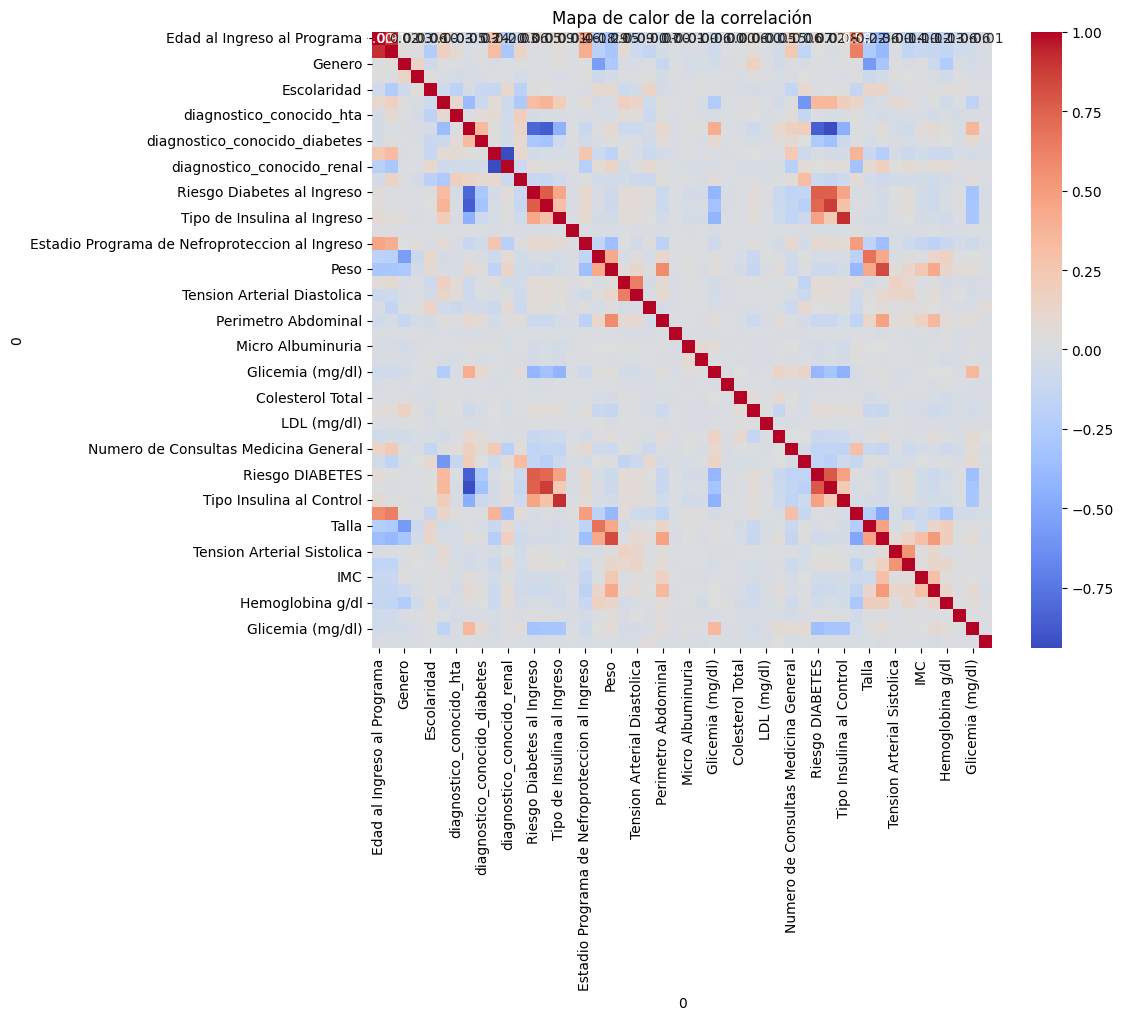

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes tu DataFrame df y has calculado la matriz de correlación
correlacion = test.corr()

# Crear un mapa de calor con la matriz de correlación
plt.figure(figsize=(10, 8))  # Puedes ajustar el tamaño según tus necesidades
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de la correlación')
plt.show()


In [139]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38741 entries, 0 to 38740
Data columns (total 48 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Edad al Ingreso al Programa                                  38741 non-null  int32  
 1   Edad Actual                                                  38741 non-null  int32  
 2   Genero                                                       38741 non-null  int32  
 3   Estado Civil                                                 38741 non-null  int32  
 4   Escolaridad                                                  38741 non-null  int32  
 5   HTA                                                          38741 non-null  int32  
 6   diagnostico_conocido_hta                                     38741 non-null  int32  
 7   Diabetes                                                     38741 non-null 

### REVISIÓN ESTADÍSTICA

In [142]:
test['Edad Actual'].describe()

count    38741.000000
mean        70.975865
std         12.756737
min          5.000000
25%         63.000000
50%         72.000000
75%         80.000000
max        105.000000
Name: Edad Actual, dtype: float64

In [144]:
test[test['Edad Actual']==5]

,Edad al Ingreso al Programa,Edad Actual,Genero,Estado Civil,Escolaridad,HTA,diagnostico_conocido_hta,Diabetes,diagnostico_conocido_diabetes,Enfermedad Renal Cronica,diagnostico_conocido_renal,Riesgo HTA al Ingreso,Riesgo Diabetes al Ingreso,Tipo Diabetes al Ingreso,Tipo de Insulina al Ingreso,TFG (Cockcroft y Gault) al Ingreso Nefroproteccion- Calculo,Estadio Programa de Nefroproteccion al Ingreso,Talla,Peso,Tension Arterial Sistolica,Tension Arterial Diastolica,IMC,Perimetro Abdominal,Creatinina Suero (mg/dl),Micro Albuminuria,Albuminuria/Creatinuria (mg/g),Glicemia (mg/dl),HbA1c,Colesterol Total,HDL (mg/dl),LDL (mg/dl),Trigliceridos (mg/dl),Numero de Consultas Medicina General,Riesgo HTA,Riesgo DIABETES,Tipo Diabetes,Tipo Insulina al Control,Estadio Actual Nefroproteccion,Talla,Peso,Tension Arterial Sistolica,Tension Arterial Diastolica,IMC,Perimetro Abdominal,Hemoglobina g/dl,Hematocrito %,Glicemia (mg/dl),HbA1c
33139,2,5,1,1,13,0,1,1,0,0,2,3,2,2,1,81.0,0.0,90.0,12.2,100.0,50.0,15.06,22.0,0.5,NaN,1.2,50.0,5.0,30.0,80.0,66.0,80.0,1.0,3,0,2,1,2.0,111.5,18.6,90.0,60.0,14961.0,60.0,NaN,NaN,NaN,9.74


In [169]:
test[test['Edad Actual']==105]

,Edad al Ingreso al Programa,Edad Actual,Genero,Estado Civil,Escolaridad,HTA,diagnostico_conocido_hta,Diabetes,diagnostico_conocido_diabetes,Enfermedad Renal Cronica,diagnostico_conocido_renal,Riesgo HTA al Ingreso,Riesgo Diabetes al Ingreso,Tipo Diabetes al Ingreso,Tipo de Insulina al Ingreso,TFG (Cockcroft y Gault) al Ingreso Nefroproteccion- Calculo,Estadio Programa de Nefroproteccion al Ingreso,Talla,Peso,Tension Arterial Sistolica,Tension Arterial Diastolica,IMC,Perimetro Abdominal,Creatinina Suero (mg/dl),Micro Albuminuria,Albuminuria/Creatinuria (mg/g),Glicemia (mg/dl),HbA1c,Colesterol Total,HDL (mg/dl),LDL (mg/dl),Trigliceridos (mg/dl),Numero de Consultas Medicina General,Riesgo HTA,Riesgo DIABETES,Tipo Diabetes,Tipo Insulina al Control,Estadio Actual Nefroproteccion,Talla,Peso,Tension Arterial Sistolica,Tension Arterial Diastolica,IMC,Perimetro Abdominal,Hemoglobina g/dl,Hematocrito %,Glicemia (mg/dl),HbA1c
2476,96,105,1,5,13,1,0,0,1,1,1,2,3,3,2,36.33,3.0,156.0,73.0,170.0,100.0,30.00,100.0,1.02,0.5,71.93,116.0,6.06,129.0,55.0,60.0,70.0,NaN,2,3,3,2,3.0,151.0,73.0,126.0,80.0,32016.00,120.0,NaN,NaN,NaN,NaN
3476,90,105,1,5,2,1,2,0,1,0,2,3,3,3,2,41.22,3.0,155.0,58.0,150.0,90.0,24.14,81.0,0.00,NaN,54.00,0.0,NaN,0.0,NaN,NaN,NaN,NaN,1,3,3,2,3.0,156.0,58.0,130.0,80.0,23.83,88.0,NaN,NaN,NaN,NaN


In [146]:
len(test[test['Genero']==1]) #MUJER

24641

In [147]:
len(test[test['Genero']==0])

14100

In [148]:
mujeres = test[test['Genero']==1]
hombres = test[test['Genero']==0]

In [149]:
mujeres['Estado Civil'].value_counts()

Estado Civil
3    9709
0    5805
5    4697
4    3159
2    1269
1       2
Name: count, dtype: int64

In [150]:
hombres['Estado Civil'].value_counts()

Estado Civil
3    5736
0    4716
4    2683
5     555
2     410
Name: count, dtype: int64

In [151]:
mapeo = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapeo)

{'ANALOGA': 0, 'CONVENCIONAL': 1, nan: 2}


In [161]:
estado_civil = dfs[0].copy() 

In [162]:
estado_civil = estado_civil[['Genero', 'Estado Civil','Edad Actual']]

In [164]:
mujeres = estado_civil[estado_civil['Genero']=='F']
hombres = estado_civil[estado_civil['Genero']=='M']

In [157]:
mujeres['Estado Civil'].value_counts()

Estado Civil
SOLTERO        8440
CASADO         5805
VIUDO          4697
UNION LIBRE    3159
SEPARADO       1269
NO APLICA         2
Name: count, dtype: int64

In [158]:
hombres['Estado Civil'].value_counts()

Estado Civil
SOLTERO        4939
CASADO         4716
UNION LIBRE    2683
VIUDO           555
SEPARADO        410
Name: count, dtype: int64

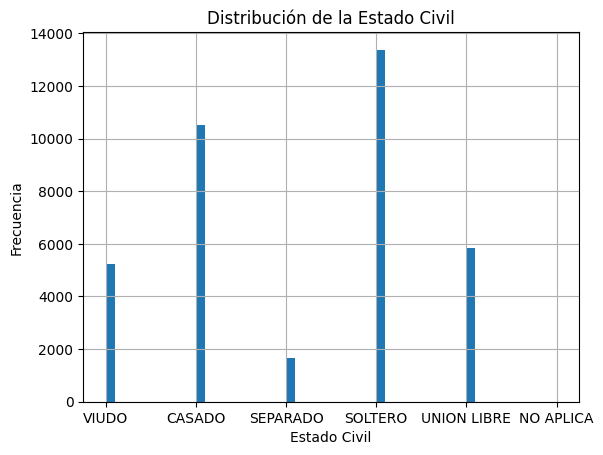

In [159]:
estado_civil['Estado Civil'].hist(bins=50)  # Ajusta el número de bins según necesites
plt.title('Distribución de la Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.show()

In [166]:
mujeres['Edad Actual'] = mujeres['Edad Actual'].astype(int)
hombres['Edad Actual'] = hombres['Edad Actual'].astype(int)

C:\Users\aleja\AppData\Local\Temp\ipykernel_27956\405832774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mujeres['Edad Actual'] = mujeres['Edad Actual'].astype(int)
C:\Users\aleja\AppData\Local\Temp\ipykernel_27956\405832774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hombres['Edad Actual'] = hombres['Edad Actual'].astype(int)


In [167]:
mujeres['Edad Actual'].describe()

count    24641.000000
mean        71.415324
std         12.569740
min          5.000000
25%         64.000000
50%         72.000000
75%         80.000000
max        105.000000
Name: Edad Actual, dtype: float64

In [168]:
hombres['Edad Actual'].describe()

count    14100.000000
mean        70.207872
std         13.042059
min          7.000000
25%         62.000000
50%         71.000000
75%         80.000000
max        104.000000
Name: Edad Actual, dtype: float64

In [ ]:
mapeos = {}

for columna in columnas_para_codificar:
    le = LabelEncoder()
    parte1[columna] = le.fit_transform(parte1[columna])
    mapeos[columna] = dict(zip(le.classes_, le.transform(le.classes_)))